In [138]:
!pip install yfinance

In [139]:
 !pip install nbformat  



In [140]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [141]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Analyzing Historical Stock/Revenue Data and Building a Dashboard

We will analyze stock data of 2 companies and their visualization based on the selected period:

* Tesla
* GameStop

### Question 1:  Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. 

In [142]:
tesla = yf.Ticker('TSLA')

In [143]:
tesla_data = tesla.history(period="max")

In [144]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [184]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [185]:
html_data = requests.get(url).text

In [186]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>]

In [189]:
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    tesla_revenue = tesla_revenue._append({"Date": date, "Revenue": revenue}, ignore_index = True)

In [190]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


### Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. 

In [151]:
gme = yf.Ticker('GME')

In [152]:
gme_data = gme.history(period="max")

In [153]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.



In [154]:
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [155]:
html_data1 = requests.get(url1).text

In [156]:
soup = BeautifulSoup(html_data1, "html.parser")
soup.find_all('title')

[<title>GameStop Revenue 2006-2020 | GME | MacroTrends</title>]

In [157]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                gme_revenue = gme_revenue._append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [158]:
tesla_revenue.dropna(inplace=True)

In [159]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


### Question 5:  Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

In [160]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=True,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

/tmp/ipykernel_5933/2534642522.py:3: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_5933/2534642522.py:4: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



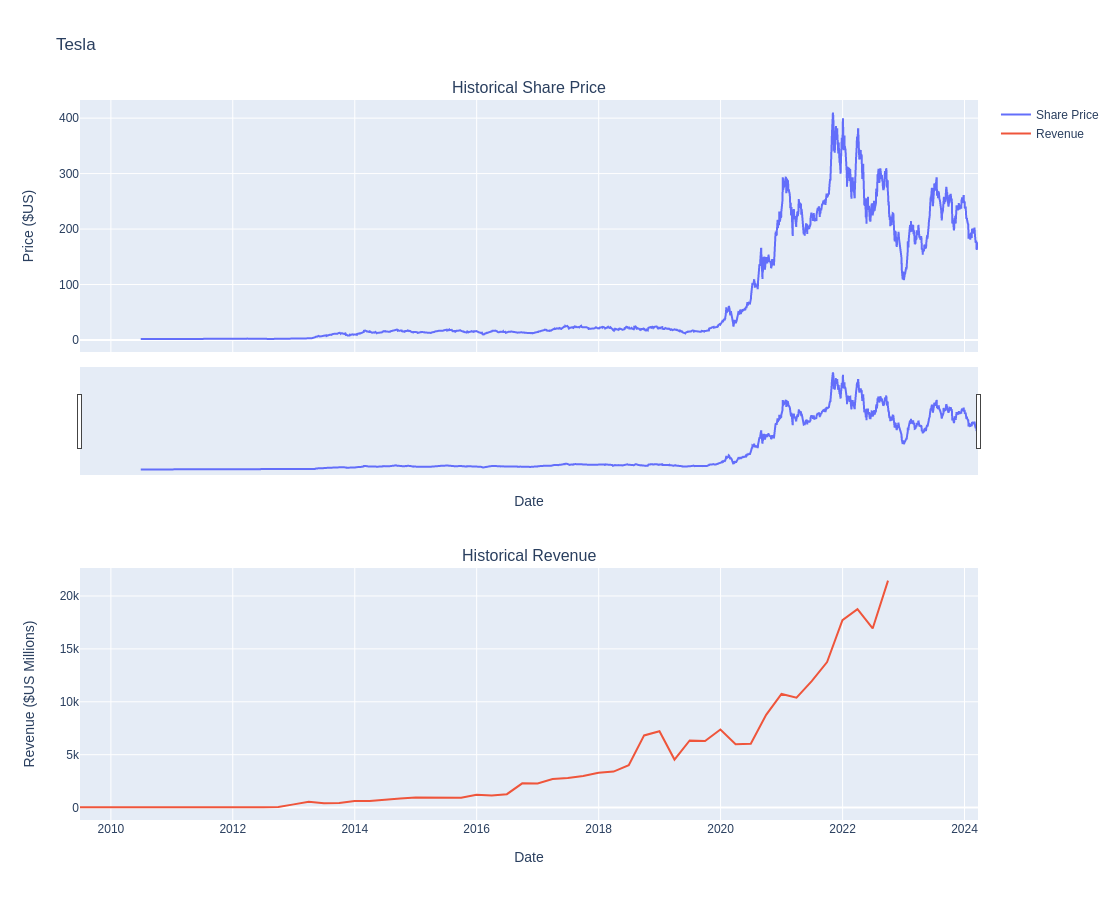

In [191]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

### Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

/tmp/ipykernel_5933/2534642522.py:3: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_5933/2534642522.py:4: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



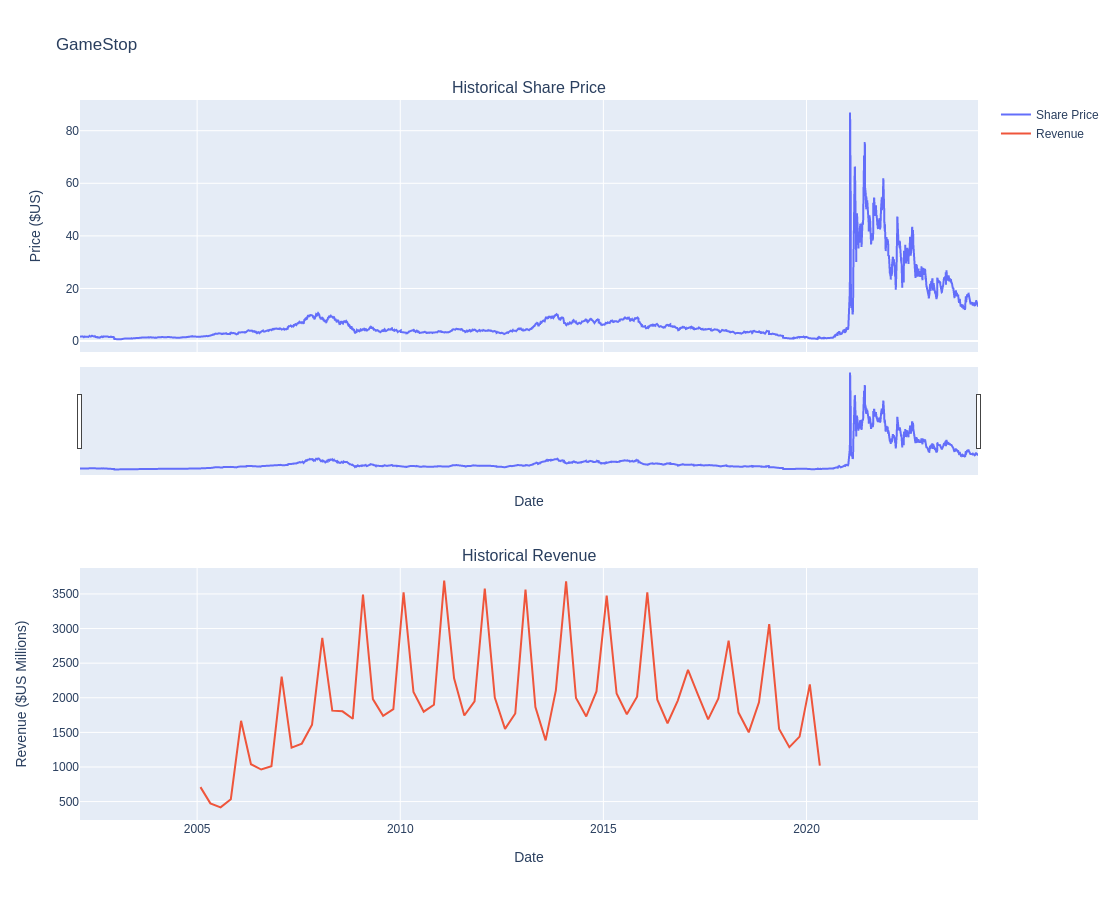

In [162]:
make_graph(gme_data, gme_revenue, 'GameStop')